In [1]:
import os
os.getcwd()

'/home/waihlan/Desktop/jupyter notebook/Tensorflow Beginner/Week4'

In [2]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
if not os.path.isdir('models'):
    os.mkdir('models')
    
print('Tensorflow version:', tf.__version__)
print('GPU is available? :', tf.test.is_gpu_available())

Tensorflow version: 2.3.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available? : False


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    
    #print('Length of x:', len(x))
    #print('Length of labels:', np.unique(y))
    #print('Indices_0: ', indices_0, '\nIndices_1:', indices_1, '\nIndices_2:', indices_2)
    
    indices = np.concatenate([indices_0, indices_1, indices_2], axis = 0)
    print('Concatenates:', indices)
    
    x = x[indices]
    y = y[indices]
    #print('X :', x, '\nY :', y)
    
    count = x.shape[0]
    #print('Shape of X:', x.shape)
    #print('range of count :', range(count))
    
    indices = np.random.choice(range(count), count, replace = False)
    
    x = x[indices]
    y = y[indices]
    #print('Random of X:', x)
    #print('Random of Y:', y)
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_train, y_train) = get_three_classes(x_train, y_train)
(x_test, y_test) = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Concatenates: [   29    30    35 ... 49987 49991 49995]
Concatenates: [   3   10   21 ... 9970 9982 9989]
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


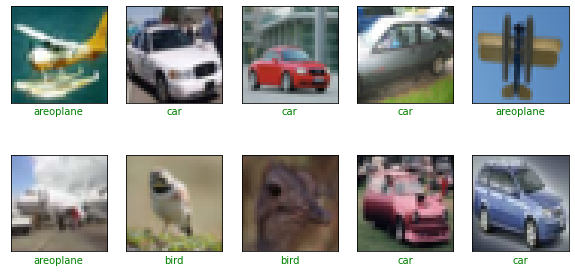

In [7]:
class_names = ['areoplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
        
    plt.show()
    
show_random_examples(x_train, y_train, y_train)

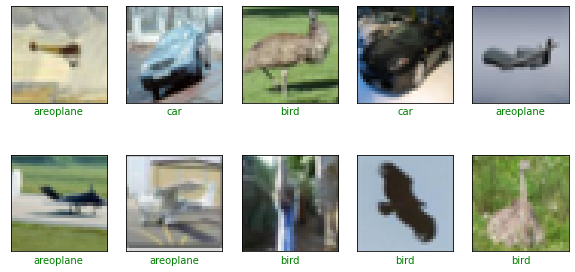

In [8]:
show_random_examples(x_test, y_test, y_test)

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
    
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    MaxPooling2D(pool_size = 2),
    
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = 2),
    
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = 2),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(3, activation = 'softmax')  
    
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [10]:
history = model.fit(
    x_train / 255., y_train,
    validation_data = (x_test / 255., y_test),
    epochs = 20, batch_size = 128,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only = True,
            save_weights_only = False,
            monitor = 'val_accuracy'
        )
    ]
)

Epoch 1/20
118/118 [==============================] - 28s 234ms/step - loss: 0.6434 - accuracy: 0.7305 - val_loss: 0.5186 - val_accuracy: 0.7827
Epoch 2/20
118/118 [==============================] - 31s 264ms/step - loss: 0.4113 - accuracy: 0.8370 - val_loss: 0.3910 - val_accuracy: 0.8467
Epoch 3/20
118/118 [==============================] - 27s 233ms/step - loss: 0.3311 - accuracy: 0.8707 - val_loss: 0.3380 - val_accuracy: 0.8680
Epoch 4/20
118/118 [==============================] - 27s 233ms/step - loss: 0.2867 - accuracy: 0.8901 - val_loss: 0.2875 - val_accuracy: 0.8887
Epoch 5/20
118/118 [==============================] - 28s 237ms/step - loss: 0.2490 - accuracy: 0.9033 - val_loss: 0.3120 - val_accuracy: 0.8827
Epoch 6/20
118/118 [==============================] - 30s 250ms/step - loss: 0.2270 - accuracy: 0.9137 - val_loss: 0.2740 - val_accuracy: 0.8933
Epoch 7/20
118/118 [==============================] - 33s 277ms/step - loss: 0.2084 - accuracy: 0.9197 - val_loss: 0.2557 - val_ac

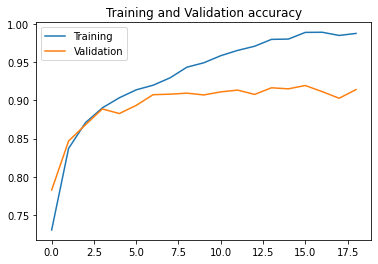

In [11]:
accs = history.history['accuracy']
val_accs = history.history['val_accuracy']
epochs = range(len(accs))

plt.plot(epochs, accs, label = 'Training')
plt.plot(epochs, val_accs, label = 'Validation')

plt.legend()

plt.title('Training and Validation accuracy')
plt.show()

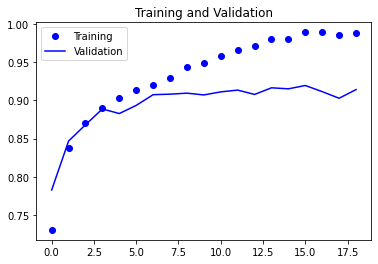

In [12]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

plt.plot(epochs, loss, 'bo', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')

plt.legend()

plt.title('Training and Validation')
plt.show()

In [13]:
model = tf.keras.models.load_model('models/model_0.909.h5')

In [14]:
pred = model.predict(x_test / 255.)

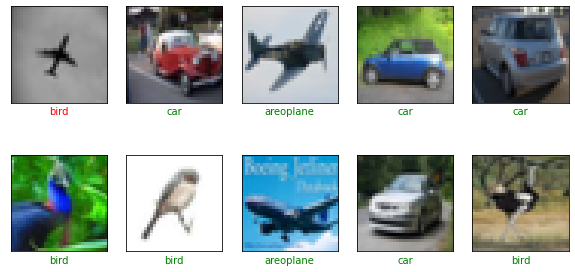

In [15]:
show_random_examples(x_test, y_test, pred)

In [26]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

uploaded = tf.keras.preprocessing.image.load_img('/home/waihlan/picture')

for file_name in uploaded.keys():
 
  # predicting images
  path = '/home/waihlan/Desktop/jupyter notebook/Tensorflow Beginner/Week4' + file_name
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print()
  print('Classes[0]:', classes[0])

# aeroplane, # car, # bird

  if classes[0][0].astype('int') == 1:
    print(file_name, ' is an', 'aeroplane')
  elif classes[0][1].astype('int') == 1:
    print(file_name, ' is a', 'car')
  elif classes[0][2].astype('int') == 1:
    print(file_name, ' is a', 'bird')

IndentationError: unexpected indent (<ipython-input-26-d800ba7d89de>, line 9)